## 1. What is a neural network? What are the general steps required to build a neural network? 
- Neural network is an algorithm that recognizes the underlying pattern of data through a process that mimics human brain operation. 

- Steps required to build neural network
    - Indentify input features and output(target) feature
    - Define hiddlen neurons and hidden layers. These nodes interact with each other and weights are generated.
    - activation functions like relu, sigmoid, tanh etc. are used in hidden layers
    - forward propogation and backward propogation
    - loss function 
    - optimizer - choosing optimizer like Adam, RMPprop, SGD(Stochastics Gradient Descent)
    - Identify metric like accuracy, mean_squared_error based on the problem in hand
  

## 2. Generally, how do you check the performance of a neural network? Why? 

- Performance metric depends on the problem at hand. What kind of domain it is, what is an important metric in that domain e.g mean_squared,error, r2_score for regression(continuous variable) problems, accuracy score, precision and recall for classification problems(discrete variable).
- Checking if the model overfits or underfits
- Hyperparameter tuning e.g  some of the hyperparameters are the number of layers in the neural network, activation function, loss function, optimizer used(gradient descent, RMSprop), kernel size, batch size, number of epochs to train, learning rate etc.

## 3, 4 & 5 Create a KNN, pytorch and Keras model for abalone dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',300)

In [2]:
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error,r2_score)

from sklearn.metrics import recall_score ,precision_recall_fscore_support,confusion_matrix,accuracy_score,make_scorer
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer


In [3]:
#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F #this has activation functions

In [4]:
#keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


## Load abalone dataset

In [5]:
column_list = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_df = pd.read_table("../week_17/abalone.data",sep=",",header=None,names=column_list)
abalone_copy_df = abalone_df.copy()

In [6]:
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Analysis and preprocessing

<AxesSubplot:>

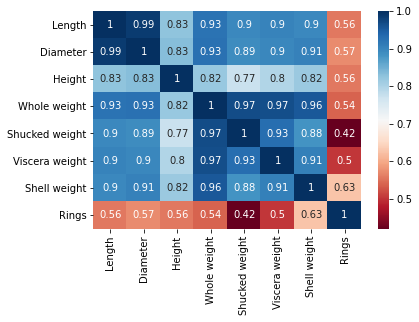

In [7]:
sns.heatmap(abalone_df.corr(),annot=True,cmap='RdBu')

In [8]:
abalone_df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

### check relation of features with target variable

In [9]:
numeric_features = ["Length", 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight']
target = "Rings"

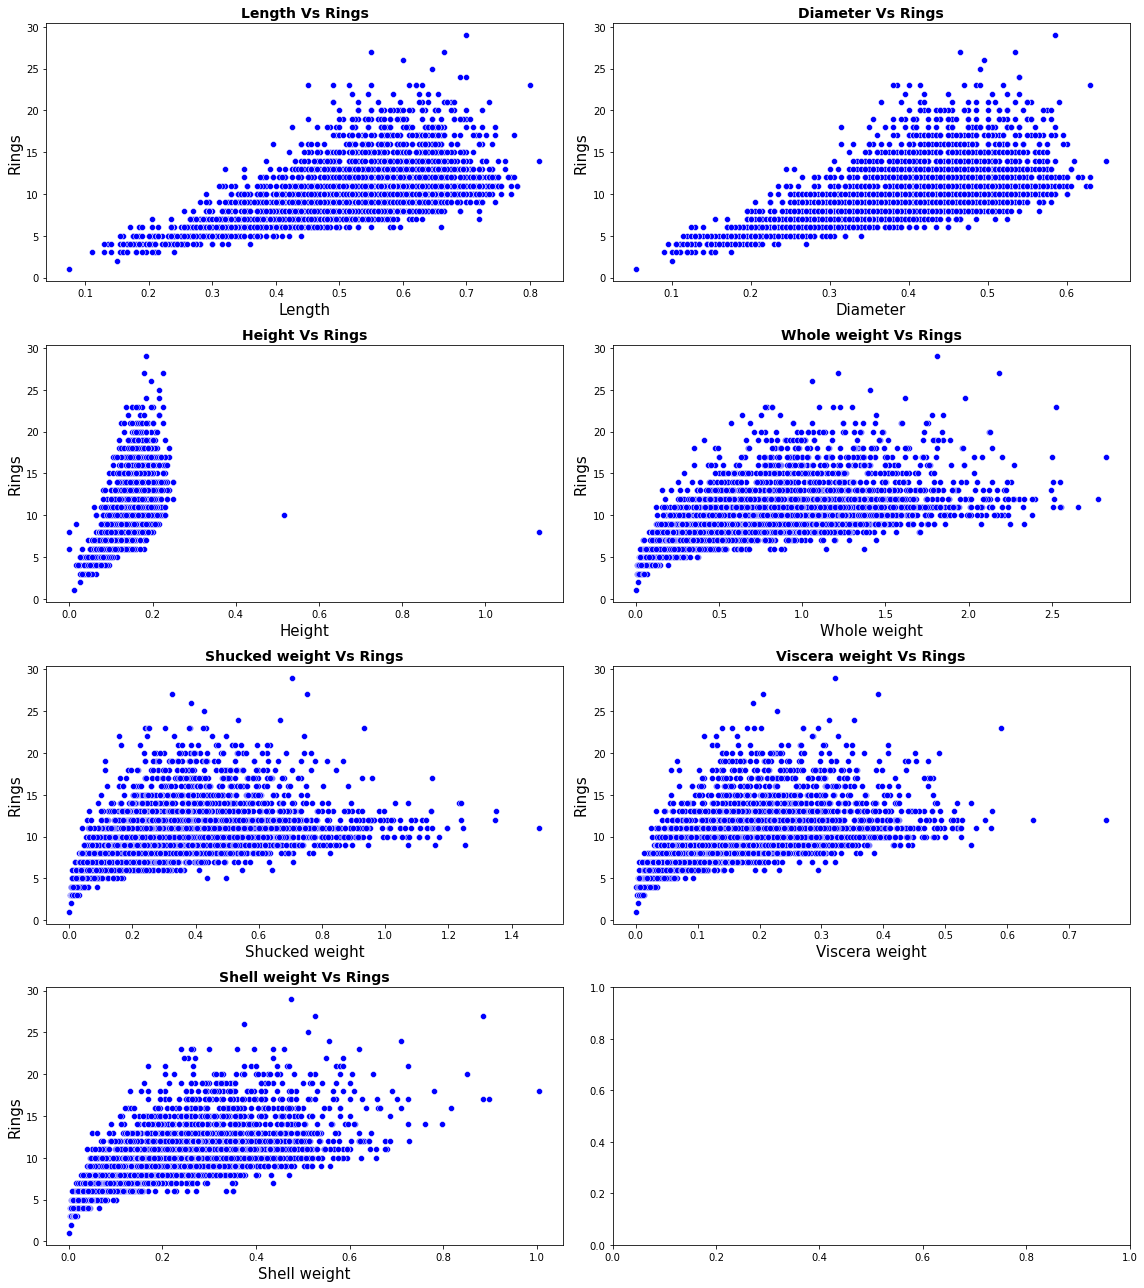

In [10]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numeric_features):
    _ = sns.scatterplot(x=abalone_df[c], y=abalone_df[target],ax=axes[i], color='blue')
    axes[i].set_title(f"{c} Vs Rings", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('Rings', fontsize=15)
    
plt.tight_layout()
plt.show()

### Identify and remove outliers

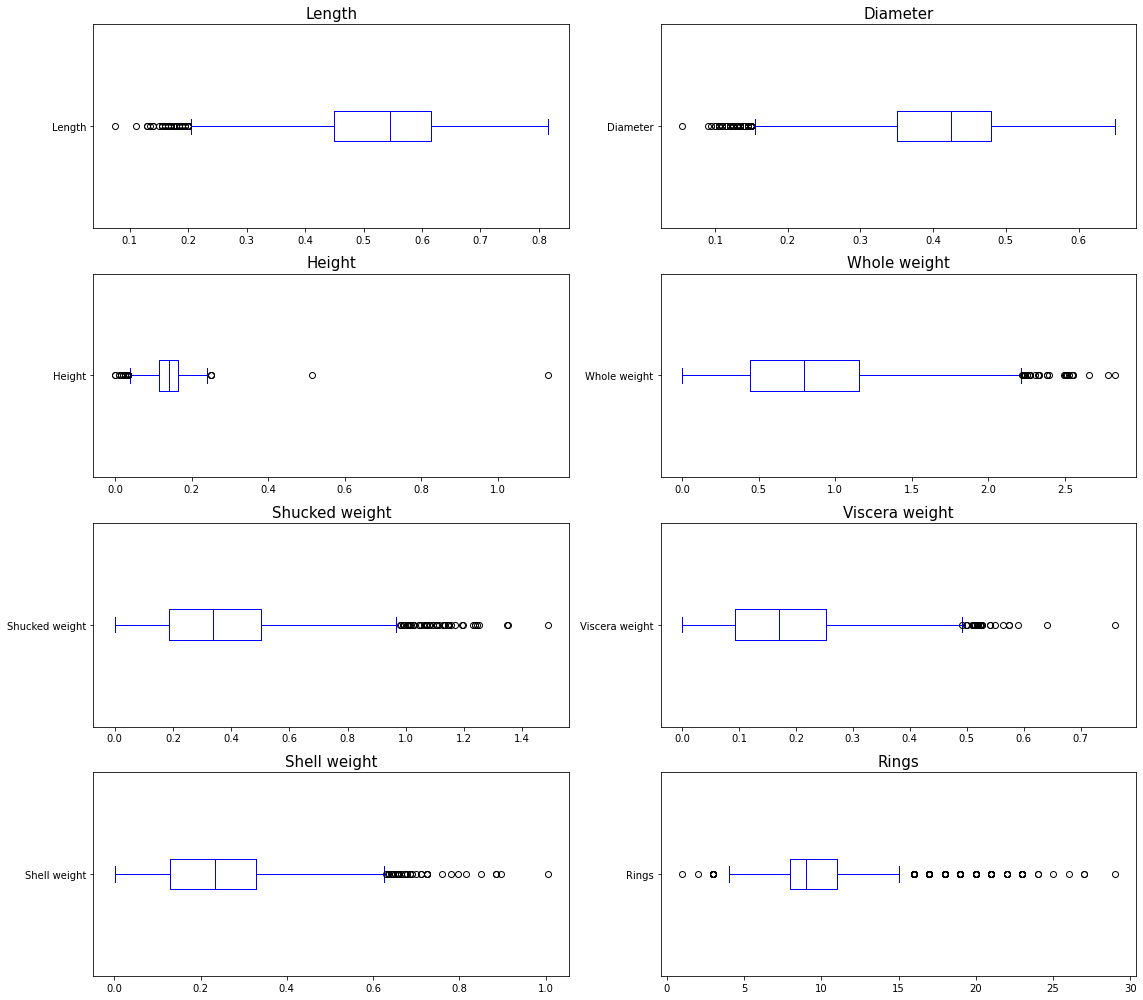

In [11]:
features = ["Length", 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight','Rings']

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(features):
    hist = abalone_df[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

## Z-score to detect and remove outliers

In [12]:
from scipy import stats
z = np.abs(stats.zscore(abalone_df.drop('Sex',axis=1)))  
threshold = 3
abalone_df = abalone_df[(z < 3).all(axis=1)]    
abalone_df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


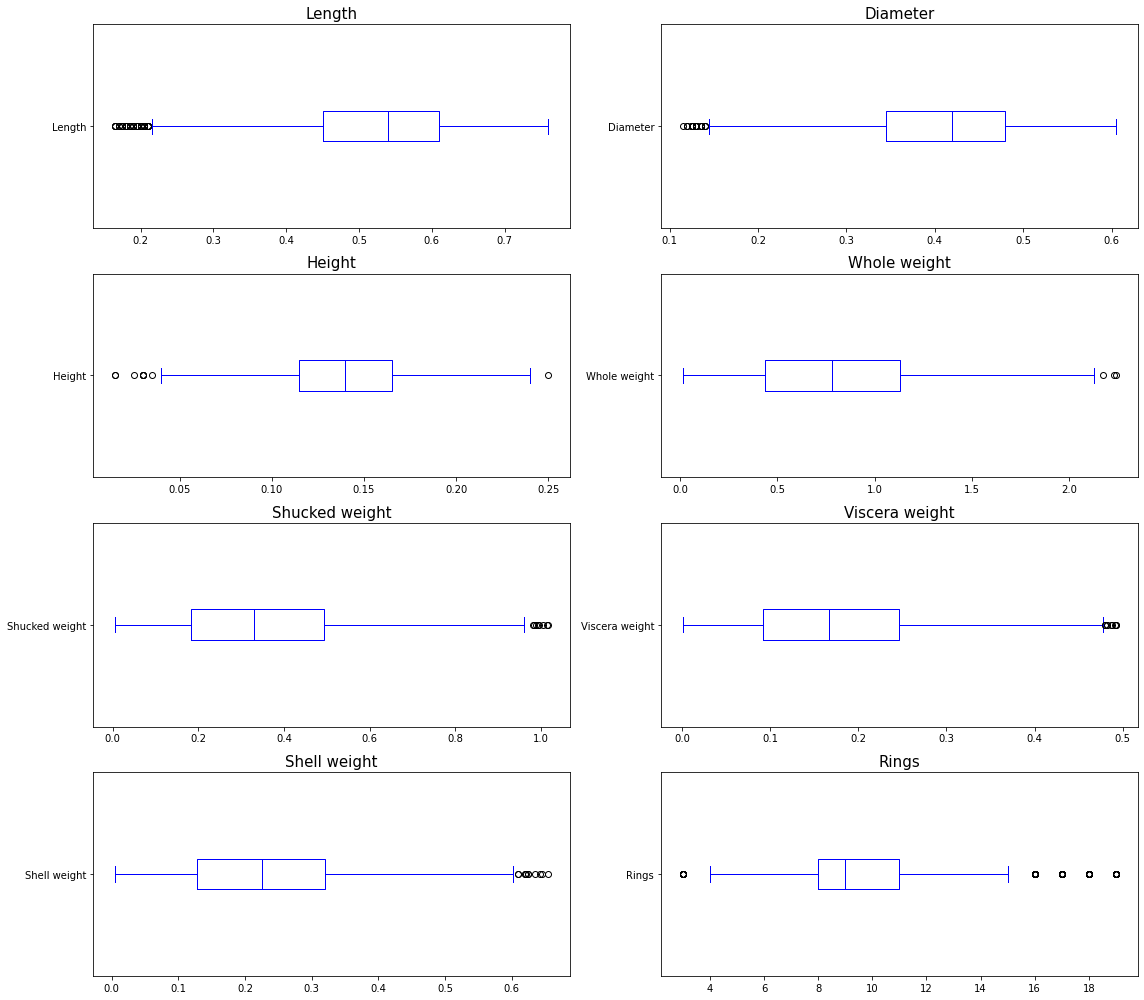

In [13]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(features):
    hist = abalone_df[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

In [14]:
abalone_df['Rings'].value_counts().sort_index()

3      10
4      49
5     113
6     258
7     391
8     566
9     686
10    625
11    472
12    251
13    199
14    119
15    102
16     62
17     53
18     39
19     32
Name: Rings, dtype: int64

### Label encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

abalone_df['Sex_E']=le.fit_transform(abalone_df['Sex'])

# Drop sex variable after encoding:
abalone_df.drop('Sex',axis=1,inplace=True)


# Predicting Rings(age) of abalone as classification problem

### Trying with grouping rings in 3 labels 

- KNN
    - Accuracy Score : 0.78

- pytorch
    - Accuracy Score : 0.80

- Keras
    - Accuracy Score : 0.79 
    

In [16]:
#Grouping rings in 3 labels
def ring_label3(rings):
    if rings<=8:
        return 0
    elif rings>8  and rings<=15:
        return 1
    else: #rings>=11 and rings<=29:
        return 2

In [17]:
#Grouping rings in 6 labels    
def ring_label6(rings):
    if rings < 6:
        return 0
    elif rings <= 9:
        return 1
    elif rings <= 12:
        return 2
    elif rings <= 15:
        return 3
    elif rings <= 18:
        return 4
    else:
        return 5

In [18]:
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_E
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [19]:
print(abalone_df['Rings'].min(),abalone_df['Rings'].max())

3 19


In [20]:
#Creating new column Ring_label to apply the ring_label3 function 
#Accuracy_score - KNN=0.781 , pytorch=0.78, Keras = 0.79
abalone_df['Ring_label']=abalone_df.apply (lambda row: ring_label3(row['Rings']),axis=1)

#Creating new column Ring_label to apply the ring_label3 function 
#abalone_df['Ring_label']=abalone_df.apply (lambda row: ring_label6(row['Rings']),axis=1)


In [21]:
abalone_df['Ring_label'].unique()

array([1, 0, 2], dtype=int64)

In [22]:
#Set X as all the features except Rings and Ring label and y as target i,e Rings
X = abalone_df.drop(['Rings','Ring_label'], axis=1).values
#X = abalone_df[['Shell weight','Length','Height','Sex_F','Sex_I']].values 
y = abalone_df['Ring_label'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) #, stratify=y)

# #Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## KNN Classifier

In [23]:
#Check the best k
kFold = StratifiedKFold(n_splits=10)
scoring = make_scorer(accuracy_score)

knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors' : [1,2,3,4,5,7,10,15,20,25,30,32,33,35]}

grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = scoring, return_train_score=True)

grid_search.fit(X_train, y_train)#


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30,
                                         32, 33, 35]},
             return_train_score=True, scoring=make_scorer(accuracy_score))

In [24]:
print(grid_search.best_params_)
grid_search.best_score_

{'n_neighbors': 10}


0.7897350993377483

In [25]:
#knn regression using k=10
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)

y_KNN_pred = knn_clf.predict(X_test)

knn_train_recall_score = precision_recall_fscore_support(y_train,  knn_clf.predict(X_train), average='weighted')
knn_test_recall_score = precision_recall_fscore_support(y_test, y_KNN_pred, average='weighted')

print('Train scores: {}'.format(knn_train_recall_score))
print('Test scores: {}' .format(knn_test_recall_score))

confusion_matrix(y_test, y_KNN_pred)

Train scores: (0.8133991720842344, 0.8162251655629139, 0.7980020325560083, None)
Test scores: (0.7923465104534911, 0.7815292949354519, 0.7630894161111292, None)


array([[238,  77,   0],
       [ 94, 548,   0],
       [  1,  48,   1]], dtype=int64)

In [26]:

a_score = accuracy_score(y_test, y_KNN_pred)
print(a_score)

0.7815292949354519


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_KNN_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       315
           1       0.81      0.85      0.83       642
           2       1.00      0.02      0.04        50

    accuracy                           0.78      1007
   macro avg       0.84      0.54      0.54      1007
weighted avg       0.79      0.78      0.76      1007



## Pytorch classification

In [28]:
# Creating tensors
X_train_torch = torch.FloatTensor(X_train)
X_test_torch = torch.FloatTensor(X_test)

y_train_torch = torch.LongTensor(y_train)
y_test_torch = torch.LongTensor(y_test)


input features=8 an output_features=3 (i.e 3 ring labels)

In [29]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, hidden3=20,out_features =3):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.layer_3_connection = nn.Linear(hidden2,hidden3)
        self.out = nn.Linear(hidden3, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = F.relu(self.layer_3_connection(x))
        x = self.out(x)
        return x

In [30]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()

In [31]:
# loss function
loss_function = nn.CrossEntropyLoss()
#loss_function = nn.NLLLoss()

#optimizer
#Tried different learning rate like 0.001,0.05 etc
optimizer = torch.optim.Adam(model.parameters()) #, lr = 0.01)
#optimizer =  torch.optim.SGD(model.parameters()) #, lr=0.05) #, momentum=0.9)
#optimizer = torch.optim.RMSprop(model.parameters()) # lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)


In [32]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train_torch)
    loss = loss_function(y_pred, y_train_torch)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch

Epoch number: 1 with loss: 1.077970027923584
Epoch number: 11 with loss: 1.0455092191696167
Epoch number: 21 with loss: 1.0099942684173584
Epoch number: 31 with loss: 0.9619206190109253
Epoch number: 41 with loss: 0.8963559865951538
Epoch number: 51 with loss: 0.8121349215507507
Epoch number: 61 with loss: 0.7220032215118408
Epoch number: 71 with loss: 0.6533626317977905
Epoch number: 81 with loss: 0.6226088404655457
Epoch number: 91 with loss: 0.6122812628746033
Epoch number: 101 with loss: 0.6044801473617554
Epoch number: 111 with loss: 0.5984156131744385
Epoch number: 121 with loss: 0.5943113565444946
Epoch number: 131 with loss: 0.5909097790718079
Epoch number: 141 with loss: 0.5877756476402283
Epoch number: 151 with loss: 0.5848464369773865
Epoch number: 161 with loss: 0.5818641781806946
Epoch number: 171 with loss: 0.5787788033485413
Epoch number: 181 with loss: 0.575623631477356
Epoch number: 191 with loss: 0.572325587272644
Epoch number: 201 with loss: 0.5688655376434326
Epoch 

In [33]:
#predictions
y_pytorch_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test_torch):
        prediction = model(data)
        y_pytorch_pred.append(prediction.argmax().item())

In [34]:

a_score = accuracy_score(y_test, y_pytorch_pred)
print(a_score)

0.7954319761668321


In [35]:
print(classification_report(y_test, y_pytorch_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       315
           1       0.81      0.88      0.85       642
           2       1.00      0.02      0.04        50

    accuracy                           0.80      1007
   macro avg       0.86      0.55      0.54      1007
weighted avg       0.80      0.80      0.78      1007



## Keras classification

In [36]:
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_E,Ring_label
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,1


In [37]:

predictors = X_train #abalone_df.drop(['Rings','Age_label'], axis=1).values
#target = y_train # to use for SparseCategoricalCrossentropy
target = to_categorical(y_train,dtype='int32') #to use for categorical_crossentropy

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = Sequential()
model.add(Dense(units=10, input_dim=8,activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=3,activation='softmax'))
#model.compile(optimizer=keras.optimizers.Adam(),
#              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
#              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
early_stop = keras.callbacks.EarlyStopping(patience=5) , #monitor='val_loss',

history=model.fit(predictors,target,batch_size=5, validation_split = 0.2, callbacks=[early_stop], epochs=100)
 
# Model summary for number of parameters use in the algorithm
model.summary()




Epoch 1/100
484/484 [==============================] - 11s 14ms/step - loss: 0.7801 - accuracy: 0.6912 - val_loss: 0.5224 - val_accuracy: 0.8046
Epoch 2/100
484/484 [==============================] - 1s 2ms/step - loss: 0.6134 - accuracy: 0.7529 - val_loss: 0.5056 - val_accuracy: 0.8162
Epoch 3/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5707 - accuracy: 0.7753 - val_loss: 0.5150 - val_accuracy: 0.8046
Epoch 4/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5586 - accuracy: 0.7794 - val_loss: 0.4864 - val_accuracy: 0.8195
Epoch 5/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5617 - accuracy: 0.7791 - val_loss: 0.4925 - val_accuracy: 0.8195
Epoch 6/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7909 - val_loss: 0.4716 - val_accuracy: 0.8129
Epoch 7/100
484/484 [==============================] - 1s 2ms/step - loss: 0.5232 - accuracy: 0.7787 - val_loss: 0.4754 - val_accuracy: 0.81

In [39]:
#calculate predictions
y_pred = model.predict(X_test)


In [40]:
#score, acc = model.evaluate(X_test, y_test,batch_size=5) # to use for SparseCategoricalCrossentropy
score, acc = model.evaluate(X_test, to_categorical(y_test,dtype='int32'),batch_size=5)
print('Test score:', score)
print('Test accuracy:', acc)


202/202 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7875
Test score: 0.5116257071495056
Test accuracy: 0.7874875664710999


In [41]:
#Print predictions
y_keras_pred = []
for y in y_pred:
    y_keras_pred.append(np.argmax(y))


In [42]:
a_score = accuracy_score(y_test, y_keras_pred)
print(a_score)

0.7874875868917577


In [43]:
print(classification_report(y_test, y_keras_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       315
           1       0.83      0.85      0.84       642
           2       0.33      0.02      0.04        50

    accuracy                           0.79      1007
   macro avg       0.63      0.55      0.54      1007
weighted avg       0.77      0.79      0.77      1007



## 6. Compare the performance of the neural networks to the other model you created. Which performed better?Why do you think that is?
- Comparing the classification models among KNN,Keras and pytorch, pytorch performed little better than other two with accuracy score of 0.80
- Below I tried doing prediction of rings as a regression problem. Comparing the 3 models, keras rmse was less than other two models. Keras rmse = 1.94
- When doing neural network alogorithm interactions betweent the features is considered. Weights are assigned to each interactions and prediction is done with forward propogation. With backward propogation the weights are adujsted until the model is run for number of epoch reducing the error loss. Also, while using KNN algorithm there are not many hyperparameters to tune to try to improve the performance. For NN, we could try improving performance by selecting the optimizer, trying different leaning rate, trying different hidde layers and units, trying different activation function. I think that is why NN algorithm did better.


# Predicting rings(age) of abalone as regression problem

- KNN
    - Test rmse :  2.053996892141047 Test MSE: 4.21890323292508
    - R2 score :  0.48342953478625084

- pytorch
    - Test rmse :  2.873322517620759 Test MSE: 8.255982290266497
    - R2 score :  -0.010878027444558569

- Keras
    - Test rmse :  1.9439716576805683 Test MSE: 3.7790258058653365
    - R2 score :  0.5372889562017393

In [44]:
#function to calculate root mean squared error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [45]:
# X and y values
X = abalone_df.drop(['Rings','Ring_label'], axis=1).values
y = abalone_df['Rings'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) #, stratify=y)

# #Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Using KNN regressor
###### Trying to find best k value

In [46]:
kFold = StratifiedKFold(n_splits=5)

knn_clf = KNeighborsRegressor()

param_grid = {'n_neighbors' : [1,5,9,10,15,30,32,33,35]}

grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
grid_search.best_score_


{'n_neighbors': 15}


0.5083406061739383

In [47]:
knn_reg = KNeighborsRegressor(n_neighbors=15)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [48]:
y_KNNreg_pred = knn_reg.predict(X_test)
print("Train rmse : ", rmse(y_train, knn_reg.predict(X_train)), "Train MSE:",mean_squared_error(y_train, knn_reg.predict(X_train)))
print("Test rmse : ", rmse(y_test, y_KNNreg_pred), "Test MSE:",mean_squared_error(y_test, y_KNNreg_pred))
print("R2 score : ",r2_score(y_test,y_KNNreg_pred))

Train rmse :  1.8666615420932497 Train MSE: 3.484425312729949
Test rmse :  2.053996892141047 Test MSE: 4.21890323292508
R2 score :  0.48342953478625084


## pytorch -  regressor

In [49]:
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_E,Ring_label
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,1


In [50]:
# Creating tensors
X_train_torch = torch.FloatTensor(X_train)
X_test_torch = torch.FloatTensor(X_test)

y_train_torch = torch.FloatTensor(y_train)
y_test_torch = torch.FloatTensor(y_test)


In [51]:
y_train_torch.shape
print(y_test_torch.shape)

torch.Size([1007])


In [52]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, hidden3=20, out_features =1):
   # def __init__(self, input_features=8, hidden1=20,hidden2=20, out_features =1):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.layer_3_connection = nn.Linear(hidden2, hidden3)
        self.out = nn.Linear(hidden3, out_features)
    
    def forward(self, x):
        #apply activation functions
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = F.relu(self.layer_3_connection(x))
        x = self.out(x)
        return x

In [53]:
torch.manual_seed(42)

#instantiate the model
model = ANN_Model()


In [54]:
# loss function
#loss_function = nn.L1Loss()

loss_function = nn.MSELoss()
#optimizer
#Tried different learning rates like 0.1,0.001,0.01,0.05
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
#optimizer = torch.optim.Adam(model.parameters()) #,lr = 0.001)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01) #, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

In [55]:
#run model through multiple epochs/iterations
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = model.forward(X_train_torch)
    loss = loss_function(y_pred, y_train_torch)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss.item()}')
    
    optimizer.zero_grad() #zero the gradient before running backwards propagation
    loss.backward() #for backward propagation 
    optimizer.step() #performs one optimization step each epoch
    

Epoch number: 1 with loss: 104.62442016601562
Epoch number: 11 with loss: 99.5844497680664
Epoch number: 21 with loss: 94.39200592041016
Epoch number: 31 with loss: 88.54486083984375
Epoch number: 41 with loss: 81.29169464111328
Epoch number: 51 with loss: 71.22352600097656
Epoch number: 61 with loss: 55.79246520996094
Epoch number: 71 with loss: 33.87814712524414
Epoch number: 81 with loss: 16.930845260620117
Epoch number: 91 with loss: 13.023138999938965
Epoch number: 101 with loss: 12.166559219360352
Epoch number: 111 with loss: 11.550741195678711
Epoch number: 121 with loss: 11.021758079528809
Epoch number: 131 with loss: 10.565007209777832
Epoch number: 141 with loss: 10.173322677612305
Epoch number: 151 with loss: 9.839507102966309
Epoch number: 161 with loss: 9.557292938232422
Epoch number: 171 with loss: 9.321537017822266
Epoch number: 181 with loss: 9.126115798950195
Epoch number: 191 with loss: 8.965509414672852
Epoch number: 201 with loss: 8.834943771362305
Epoch number: 211

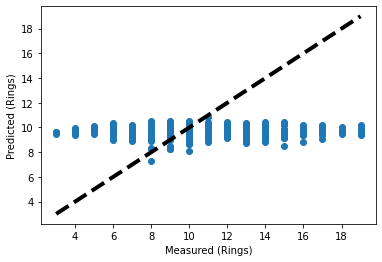

In [56]:
#predictions
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test_torch):
        prediction = model(data)
        y_pred.append(prediction.item())

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured (Rings)')
ax.set_ylabel('Predicted (Rings)')
plt.show()
 

In [57]:
y_test.shape
len(y_pred)
y_pred

[9.442310333251953,
 9.665200233459473,
 9.649370193481445,
 9.621976852416992,
 9.742005348205566,
 9.99826431274414,
 9.425402641296387,
 9.751401901245117,
 9.47000503540039,
 9.85971736907959,
 9.997286796569824,
 9.208637237548828,
 9.765360832214355,
 9.711991310119629,
 9.580314636230469,
 9.814945220947266,
 10.191803932189941,
 9.67630386352539,
 9.453229904174805,
 9.079931259155273,
 9.995625495910645,
 9.559436798095703,
 9.343072891235352,
 9.807476997375488,
 9.141592979431152,
 9.889595031738281,
 9.364103317260742,
 9.826051712036133,
 9.699939727783203,
 9.748751640319824,
 9.9097900390625,
 9.964778900146484,
 9.515698432922363,
 9.595071792602539,
 9.285472869873047,
 9.950576782226562,
 9.676863670349121,
 9.8391695022583,
 9.427115440368652,
 9.650691986083984,
 9.736632347106934,
 9.390304565429688,
 9.832489967346191,
 9.31108570098877,
 9.688395500183105,
 9.715662956237793,
 9.442095756530762,
 9.536785125732422,
 9.384932518005371,
 9.507145881652832,
 9.99934

In [58]:
#print("Train rmse : ", rmse(y_test_torch, y_pred), "Train MSE:",mean_squared_error(y_train_torch, y_pred))
print("Test rmse : ", rmse(y_test_torch,y_pred), "Test MSE:",mean_squared_error(y_test_torch, y_pred))
print("R2 score : ",r2_score(y_test_torch,y_pred))

Test rmse :  2.891167355618831 Test MSE: 8.358848678195985
R2 score :  -0.023473181802278198


## Keras model - regressor


In [59]:
model = Sequential()
model.add(Dense(units=10, input_dim=8,activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','mse'])
 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
 
history=model.fit(X_train,y_train,batch_size=5, validation_split = 0.2, callbacks=[early_stop], epochs=100)
 
# Model summary for number of parameters use in the algorithm
model.summary()


Epoch 1/100
484/484 [==============================] - 2s 2ms/step - loss: 80.0492 - mae: 8.0428 - mse: 80.0492 - val_loss: 5.9027 - val_mae: 1.8786 - val_mse: 5.9027
Epoch 2/100
484/484 [==============================] - 1s 2ms/step - loss: 5.3243 - mae: 1.7613 - mse: 5.3243 - val_loss: 4.0579 - val_mae: 1.4845 - val_mse: 4.0579
Epoch 3/100
484/484 [==============================] - 1s 2ms/step - loss: 4.5356 - mae: 1.5718 - mse: 4.5356 - val_loss: 3.7740 - val_mae: 1.4297 - val_mse: 3.7740
Epoch 4/100
484/484 [==============================] - 1s 2ms/step - loss: 4.2033 - mae: 1.4966 - mse: 4.2033 - val_loss: 3.7561 - val_mae: 1.4786 - val_mse: 3.7561
Epoch 5/100
484/484 [==============================] - 1s 2ms/step - loss: 3.8049 - mae: 1.4423 - mse: 3.8049 - val_loss: 3.6483 - val_mae: 1.3997 - val_mse: 3.6483
Epoch 6/100
484/484 [==============================] - 1s 2ms/step - loss: 3.7643 - mae: 1.4021 - mse: 3.7643 - val_loss: 3.5980 - val_mae: 1.3545 - val_mse: 3.5980
Epoch 7/

In [60]:
#Predict testing labels
 
y_pred= model.predict(X_test)


In [61]:
print(y_pred.shape)
y_test.shape
y_pred.reshape(-1,1).shape
y_pred

(1007, 1)


array([[ 7.7172165],
       [ 9.5404625],
       [14.094603 ],
       ...,
       [ 6.1101513],
       [ 9.205514 ],
       [12.158076 ]], dtype=float32)

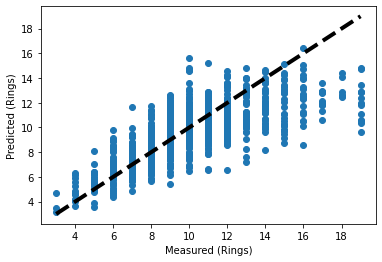

0.52074675236559


In [62]:
#visualize performance
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured (Rings)')
ax.set_ylabel('Predicted (Rings)')
plt.show()
 
#Calculate RMSE and R^2
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
 
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)

print(r_squared)

In [63]:

#print("Train rmse : ", rmse(y_train, y_pred), "Train MSE:",mean_squared_error(y_train,y_pred))
print("Test rmse : ", rmse(y_test,y_pred), "Test MSE:",mean_squared_error(y_test, y_pred))
print("R2 score : ",r2_score(y_test,y_pred))

Test rmse :  1.9784156029659279 Test MSE: 3.914128298059036
R2 score :  0.52074675236559
